In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
% matplotlib inline

precision is the ability of the classifier to not label a negative sample as positive. Again, I think we should only look at the second component.

Recall is the ability to find all positive samples. It returns an array of the number of unique samples, so we should look at the second component looking at the 1 class.

In [13]:
# undersampling
acc = np.array([.57, .57, .65, .64, .57, .57, .55, .45, .32, .58, .56, .64, .31, .38, .80, .77])
pre = np.array([.57, .70, .68, .68, .70, .70, .56, .69, .91, .60, .66, .50, .88, .81, 0, .28])
rec = np.array([.25, .28, .32, .32, .28, .28, .24, .22, .22, .26, .27, .28, .21, .22, 0, .40])
F1 = np.array([.35, .40, .44, .43, .40, .40, .34, .34, .35, .36, .38, .36, .34, .35, 0, .33])
sup = np.array([.46, .52, .43, .43, .51, .52, .47, .63, .84, .46, .50, .36, .84, .74, 0, .14])

In [10]:
# oversampling
acc = np.array([.71, .75, .65, .64, .74, .78, .58, .45, .34, .57, .56, .50, .76, .80, .80, .20])
pre = np.array([.29, .30, .68, .67, .33, .16, .49, .69, .89, .60, .66, .67, .16, .01, 0, .1])
rec = np.array([.28, .36, .32, .32, .34, .39, .24, .22, .22, .26, .27, .24, .32, .34, 0, .20])
F1 = np.array([.28, .33, .44, .43, .34, .23, .32, .34, .35, .36, .38, .35, .22, .01, 0, .34])
sup = np.array([.21, .17, .43, .43, .19, .08, .41, .63, .82, .47, .50, .56, .10, 0, 0, 1])

In [ ]:
# oversampling with scaled
acc = np.array([.71, .75, .65, .64, .74, .78, .58, .45, .34, .57, .56, .50, .76, .80, .80, .20])
pre = np.array([.29, .30, .68, .67, .33, .16, .49, .69, .89, .60, .66, .67, .16, .01, 0, .1])
rec = np.array([.28, .36, .32, .32, .34, .39, .24, .22, .22, .26, .27, .24, .32, .34, 0, .20])
F1 = np.array([.28, .33, .44, .43, .34, .23, .32, .34, .35, .36, .38, .35, .22, .01, 0, .34])
sup = np.array([.21, .17, .43, .43, .19, .08, .41, .63, .82, .47, .50, .56, .10, 0, 0, 1])

In [2]:
# scaled (no over/undersampling)
acc = np.array([.7, .79, .8, .8, .79, .79, .63, .53, .73, .8, .8, .7, .66, .56, .8])
pre = np.array([.3, .1, .06, .07, .12, .09, .65, .77, .38, .07, 0, .21, .46, .46, .16])
rec = np.array([.28, .42, .59, .54, .43, .42, .3, .27, .35, .55, 0, .23, .29, .22, .55])
F1 = np.array([.29, .16, .12, .13, .19, .14, .42, .4, .37, .12, 0, .22, .35, .3, .25])
sup = np.array([.22, .05, .02, .03, .06, .04, .43, .58, .22, .02, 0, .18, .32, .43, .06])

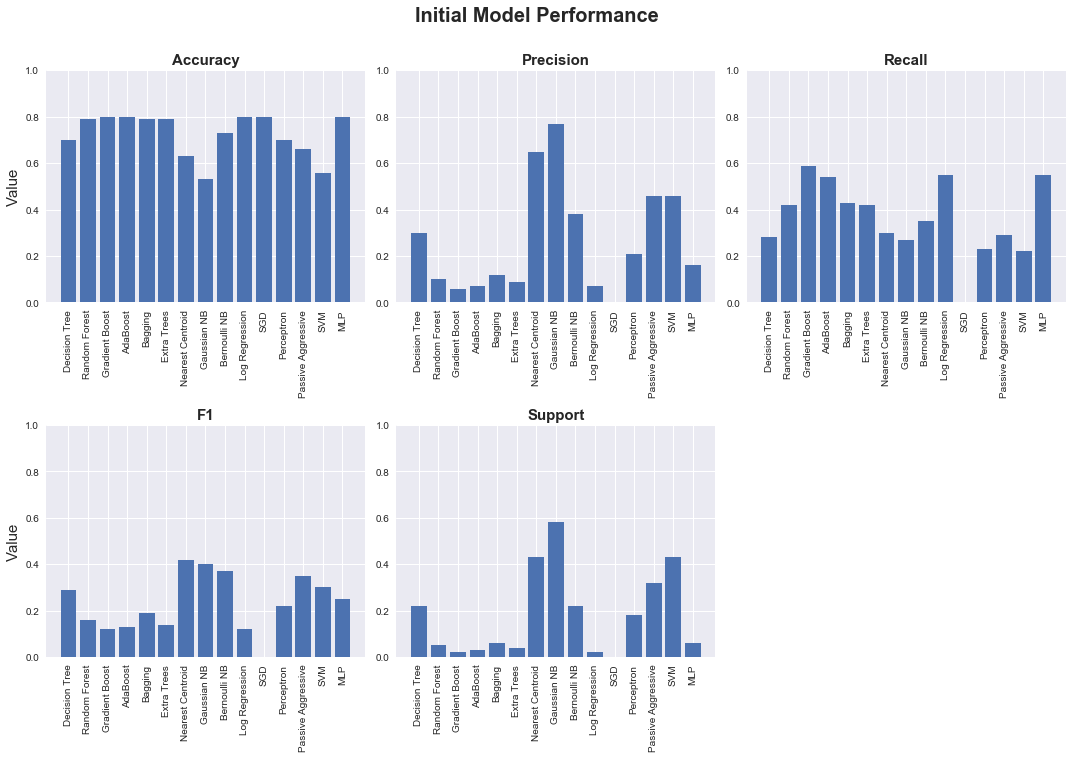

In [3]:
plt.figure(figsize=(15,10))
plt.title('Original Scores', fontsize=24, fontweight='bold')
labels = ['Decision Tree', 'Random Forest', 'Gradient Boost', 'AdaBoost', 'Bagging', 'Extra Trees', # 'KNN', 
          'Nearest Centroid', 'Gaussian NB', 'Bernoulli NB', 'Log Regression', 'SGD', 
          'Perceptron', 'Passive Aggressive','SVM','MLP']
for i, (scores, title) in enumerate(zip([acc, pre, rec, F1, sup], ['Accuracy','Precision','Recall','F1','Support'])):
    plt.subplot(2,3,i+1)
    plt.xticks(range(len(scores)), labels, rotation = 90)
    plt.bar(range(len(scores)), scores)
    plt.ylim(0,1)
    if i==0 or i==3:
        plt.ylabel('Value', fontsize=15)
    plt.title(title, fontsize=15, fontweight='bold')
plt.tight_layout()
plt.suptitle("Initial Model Performance", y=1.05, fontsize=20, fontweight='bold')
plt.savefig('orig_scaled_scores.pdf', dpi=300, bbox_inches='tight')

In [4]:
# scaled with PCA
acc2, acc1 = np.array([.79, .8, .64]), np.array([.79, .8, .8])
pre2, pre1 = np.array([.08, .03, .65]), np.array([.1, .06, .07])
rec2, rec1 = np.array([.39, .54, .32]), np.array([.42, .49, .55])
F12, F11 = np.array([.13, .06, .42]), np.array([.16, .12, .12])
sup2, sup1 = np.array([.04, .04, .42]), np.array([.05, .02, .02])

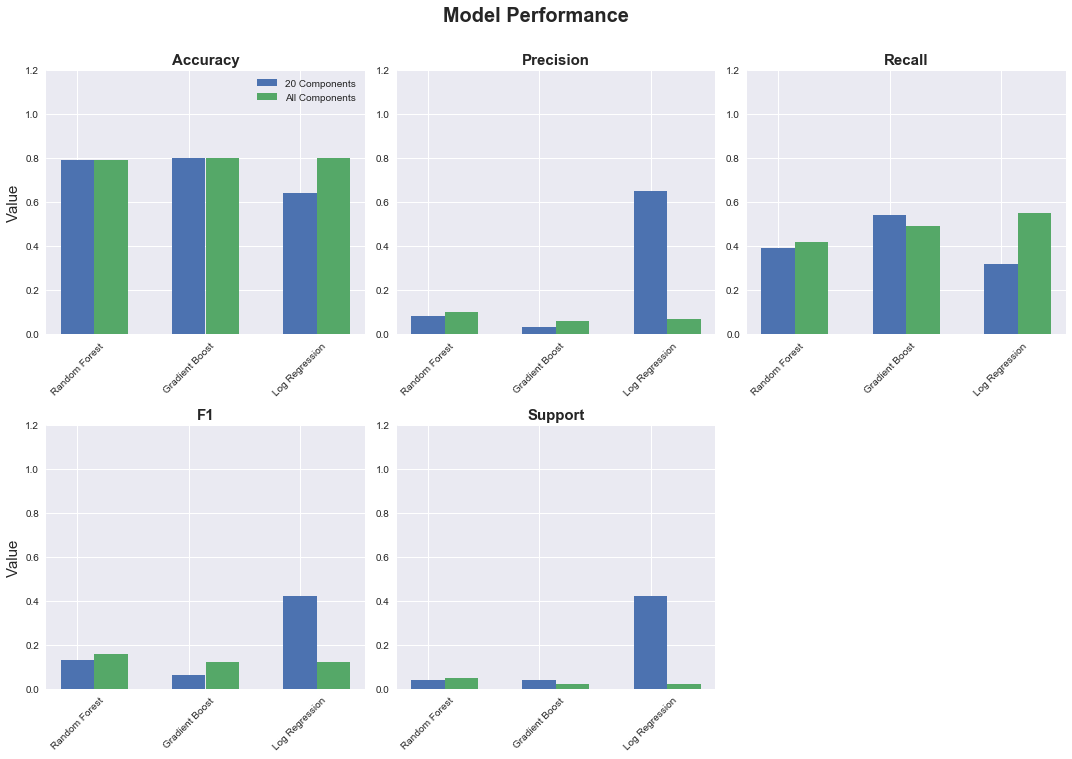

In [5]:
plt.figure(figsize=(15,10))
labels = ['Random Forest', 'Gradient Boost', 'Log Regression']
for i, (scores, title) in enumerate(zip(zip([[acc2, acc1], [pre2, pre1], [rec2, rec1], [F12, F11], [sup2, sup1]]), 
                                        ['Accuracy','Precision','Recall','F1','Support'])):
    plt.subplot(2,3,i+1)
    plt.xticks(range(3), labels, rotation = 45)
    plt.bar(range(3), scores[0][0], width=.3, label='20 Components')
    plt.bar(np.arange(3)+.3, scores[0][1], width=.3, label='All Components')
    plt.ylim(0,1.2)
    if i==0 or i==3:
        plt.ylabel('Value', fontsize=15)
    plt.title(title, fontsize=15, fontweight='bold')
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.suptitle("Model Performance", y=1.05, fontsize=20, fontweight='bold')
plt.savefig('orig_pca_scores.pdf', dpi=300, bbox_inches='tight')